# 1.About dataset

The available dataset, the information of 5000 customers, includes the customer's demographic information, the customer's relationship with the bank and the customer's response to the personal loan.480 people accepted personal loans in the previous campaign.

دیتاست موجود، اطلاعات 5000 مشتری، شامل اطلاعات جمعیت شناختی مشتری، رابطه مشتری با بانک و پاسخ مشتری به وام شخصی است. 480 نفر وام شخصی را در کمپین قبلی  پذیرفتند.

In [ ]:
# Attribute Information
#ID : Customer ID
#Age : Customer's age in completed years
#Experience : No. of years of professional experience
#Income : Annual income of the customer
#ZIP Code : Home Address Zip Code
#Family : Family size of the customer
#CCAvg : Avg. Spending on Credit Card per Month
#Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced / Professional
#Mortgage : Value of house mortgage if any
#Personal Loan : Did this customer accept the personal loan offered in the last campaign?
#Securities Account : Does the customer have a securities account with the bank?
#CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
#Online : Does the customer use internet banking facilities?
#Credit card : Does the customer use a credit card issued by this Bank?

In [ ]:
#peredict

#ID = 5071, Age = 42 ,Experience = 16, Income = 30, ZIP Code = 92037, Family = 3, CCAvg = 1/2, Education = Advanced,

#Mortgage = 0, Securities Account = 1, CD Account = 0, Online = 1, CreditCard = 1

#TARGET : Personal Loan = ? aya be shakhsi ba in moshakhasat vam pishnahad mishe ya na?

# Objectives

Exploratory Data Analysis  تجزیه و تحلیل داده

Preparing the data to train a model   پیش پردازش

Training and making predictions using a classification model    آموزش و پیش بینی مدل

Model evaluation   ارزیابی مدل

# 2.Exploratory Data Analysis

# 2.1.import libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

# 2.2.Read the Data

In [ ]:
# Read the Data
DATA= pd.read_csv("Bank_Personal_Loan_Modelling(2).csv")
DATA

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [ ]:
DATA.head(10)   # 10 satre aval

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [ ]:
DATA.tail(10)     # 10 satre akhar

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [ ]:
# dakhele data yek dataframedorost mikonom k sari update beshe dar datafarame
data = pd.DataFrame(DATA)
data

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [ ]:
data.shape     # tedade satr va sotun

(5000, 14)

In [ ]:
data.info()  #etelaat data, non-null : yani miaaing value nadarad.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP_Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
# Data Preparation

In [ ]:
data.describe()       # barresi tedad, miyangin, minimom va maximom, enheraf meyar va....

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
# moshahede mishavad k count dar hame features 5000.000000 ast pas motevaje mishavim k missing value nadarad.
# nokte dovom inke Experience(sabeghe kar) min adade manfi ast, va bayad mosbat shavad. sabghe kar manfi mani nadard.

In [ ]:
data.isnull().any()     # barresi mising value ya maghadire NAN

ID                    False
Age                   False
Experience            False
Income                False
ZIP_Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal_Loan         False
Securities_Account    False
CD_Account            False
Online                False
CreditCard            False
dtype: bool

In [ ]:
data.drop(['ID', 'ZIP_Code'], axis = 1, inplace = True)    # hazfe features "ID" & " ZIP_Code" az Dataset
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [ ]:
data.isnull().sum()   # barresi mojadad missing value featurs

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
#Data Visualization: taghsim features Numerical va Categorical

In [ ]:
cols = set(data.columns)
cols_numeric = set(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'])
cols_categorical = list(cols - cols_numeric)
cols_categorical

['Education',
 'Online',
 'Securities_Account',
 'CD_Account',
 'CreditCard',
 'Family',
 'Personal_Loan']

In [ ]:
data.info()   #etelaate data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [ ]:
# moshhede mikonim k 1 data az noe float va  11 ta data az nue "int" ast.
#dar surati k 5ta data numerical az noe int ya float bayad bashad.
# pas baraye taghire noe data va moshakhas kardane features categorical:

In [ ]:
for x in cols_categorical:
    data[x] = data[x].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   category
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   category
 8   Securities_Account  5000 non-null   category
 9   CD_Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(4)
memory usage: 230.6 KB


In [ ]:
# hal moshade mikonim k noe data moshkhas shod k 7 categorical va 5ta numerical k 4ta int va 1 float ast.

In [ ]:
data.describe().transpose()    # barresi tedad, miyangin, minimom va maximom, enheraf meyar data

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


In [ ]:
# namayeshe data numerical va categorical dar ghalebe arayeh
data_num = data.select_dtypes(include='number')
data_cat = data.select_dtypes(include='category')
print(f'Numerical Attributes: {list(data_num.columns)}')
print(f'Categorical Attributes: {list(data_cat.columns)}')

Numerical Attributes: ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
Categorical Attributes: ['Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


# Univariate Analysis - Numerical Attributes

Let's construct a function that shows the summary and density distribution of a numerical attribute:

Numerical Attributes: ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

#analyze numerical data ba rasme plot

In [ ]:
def summary(x):
    x_min = data[x].min()     # mohasebeye minimum
    x_max = data[x].max()     # mohasebeye maximum
    Q1 = data[x].quantile(0.25)   #25%    (darvaghe haman dataye describe ra mikhahim namayesh dahim.)
    Q2 = data[x].quantile(0.50)   #50%
    Q3 = data[x].quantile(0.75)   #75%
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')

    plt.subplot(441)    # in adade dakhele parantez : size plathara kuchak va bozorg mikonad. bayad 3 raghami bashad.
# harche in adad be satmte kamtar masalan 221 beravad size plot bozorgtar va harche be samte bishtar 551 beravad size plot kuchetar mishavad.
    ax1 = sns.distplot(data[x], color = 'r')   # namayesh plot be surate distplot
    plt.title(f'{x.capitalize()} Density Distribution')   #titre plot: Density Distribution

    plt.subplot(442)
    ax2 = sns.violinplot(x = data[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')

    plt.subplot(443)
    ax2 = sns.boxplot(x=data[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')

    plt.subplot(444)
    ax3 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')

    plt.show()

5 Point Summary of Age Attribute:
Age(min) : 23
Q1                    : 35.0
Q2(Median)            : 45.0
Q3                    : 55.0
Age(max) : 67


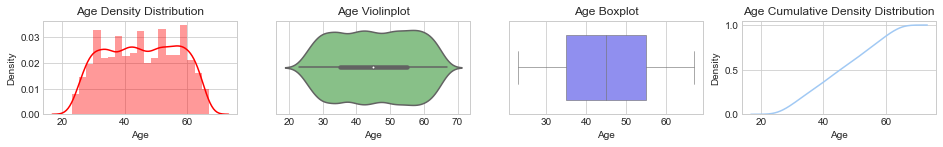

In [ ]:
summary('Age')    #sen moshtariyan

In [ ]:
# sene moshtariyan beyne minimum 23 sal va maximum 67 sal tozie shode ast.[23,67]

5 Point Summary of Experience Attribute:
Experience(min) : -3
Q1                    : 10.0
Q2(Median)            : 20.0
Q3                    : 30.0
Experience(max) : 43


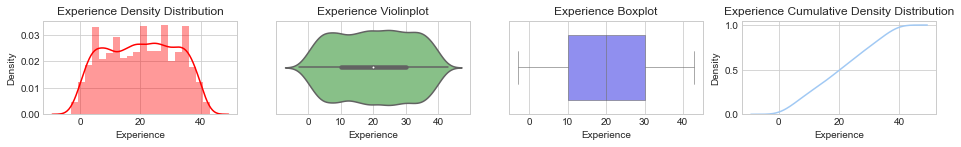

In [ ]:
summary('Experience')    #Experience : sabeghe kar moshtariyan

In [ ]:
# sabeghe kar moshtariyan beyne min (-3) va max (43)sal, va miyangin (20)sal ast.[-3,43]
# sabeghe kar nemitavanad manfi shavad pas in -3 noise mahsub mishavad va bayad feature "Experience" rafe noise shavad.
# Experience>0 bayad bashad ta adade mosbat ra begirad va midunim k hadeaghal sabeghe kar az 1 sal shoru mishavd ta...

5 Point Summary of Income Attribute:
Income(min) : 8
Q1                    : 39.0
Q2(Median)            : 64.0
Q3                    : 98.0
Income(max) : 224


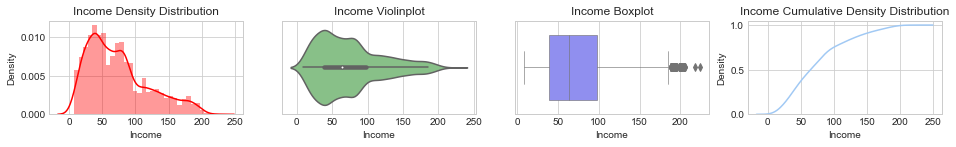

In [ ]:
summary('Income')   #Income : mizan daramade moshtariyan dar sal ($ 000)(dolar)

In [ ]:
# kamtrin miyzane daramd moshtariyan 8000$, va bishtarin mizane daramad 224000$, va miyangin 64000$ ast.
# plot ha neshun midahand k bishtarin mizane tozie hodadan beyne 39000$ ta 98000$ ast.
# beyne 98000$ ta 224000$ kheyli fasele hast pas hatman dadeye part darim samte224000 dolar.

5 Point Summary of Ccavg Attribute:
Ccavg(min) : 0.0
Q1                    : 0.7
Q2(Median)            : 1.5
Q3                    : 2.5
Ccavg(max) : 10.0


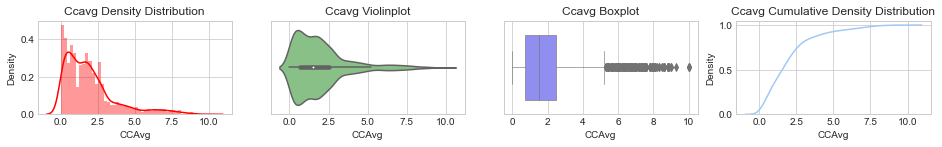

In [ ]:
summary('CCAvg')    #Mizane kharjkard az credit cartesh dar mah (S 000)

In [ ]:
# hamantor k mibinim mizane kharjkarde moshtariyan min 0(bedune kharjkard) va max 10000$ ast.[0,10]
# khob sefr k nemitune bashe pas ehtemalan sefr dadeye part hast.
#moshtariyan betore miyangin 1.5$ az mablaghe credit cart khod ra kharj mikonand

5 Point Summary of Mortgage Attribute:
Mortgage(min) : 0
Q1                    : 0.0
Q2(Median)            : 0.0
Q3                    : 101.0
Mortgage(max) : 635


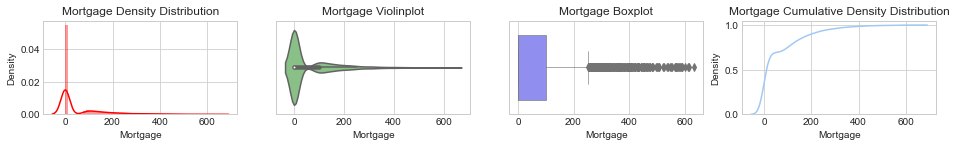

In [ ]:
summary('Mortgage')     #arzeshe khune baraye geru gozashtan dar bank cheghadr ast. ($ 000)

In [ ]:
#hadeaghal arzeshe khane 0 (yani khune nadard) va hade aksar 635$ ast.
#betor miyangin 0$ yani aksare moshtariyan khane nadashtand k dar rahne bank gharar bedahand.
# arzeshe khane moshtariyane daraye khaneh beyne 1 ta 101 $ ast.

In [ ]:
#natije : aksare plot ha be samte chap gerayesh darand. dar surati k plot tozie normal bayad vasat bashad va tavanon va vaste plot barghar bashad.
# dar vaghe bayad tozie maghadire har feature dar vsate plot bashad ta tozie normal mahsub shavad.
# pas bayad featur ha ghable az modelsazi hatman normalsazi shavand.

In [ ]:
#hazfe noise
#noise : sabeghe kar manfi nemishe
data1 = data[(data["Experience"]>0)]
data1

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [ ]:
# bad az hazfe nois az 5000 resid be 4882 satr

In [ ]:
def summary2(x):
    x_min = data1[x].min()     # mohasebeye minimum
    x_max = data1[x].max()     # mohasebeye maximum
    Q1 = data1[x].quantile(0.25)   #25%    (darvaghe haman dataye describe ra mikhahim namayesh dahim.)
    Q2 = data1[x].quantile(0.50)   #50%
    Q3 = data1[x].quantile(0.75)   #75%
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')

    plt.subplot(441)    # in adade dakhele parantez : size plathara kuchak va bozorg mikonad. bayad 3 raghami bashad.
# harche in adad be satmte kamtar masalan 221 beravad size plot bozorgtar va harche be samte bishtar 551 beravad size plot kuchetar mishavad.
    ax1 = sns.distplot(data1[x], color = 'r')   # namayesh plot be surate distplot
    plt.title(f'{x.capitalize()} Density Distribution')   #titre plot: Density Distribution

    plt.subplot(442)
    ax2 = sns.violinplot(x = data1[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')

    plt.subplot(443)
    ax2 = sns.boxplot(x=data1[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')

    plt.subplot(444)
    ax3 = sns.kdeplot(data1[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')

    plt.show()

5 Point Summary of Experience Attribute:
Experience(min) : -3
Q1                    : 10.0
Q2(Median)            : 20.0
Q3                    : 30.0
Experience(max) : 43


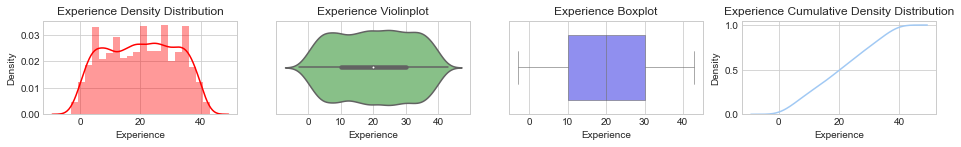

In [ ]:
summary('Experience')      #plot ghable hazfe noise

5 Point Summary of Experience Attribute:
Experience(min) : 1
Q1                    : 11.0
Q2(Median)            : 21.0
Q3                    : 30.0
Experience(max) : 43


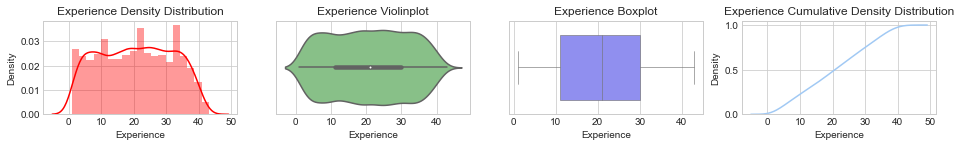

In [ ]:
summary2('Experience')     #plot bad az hazfe noise

In [ ]:
#featyre 'Experience' hamantor k mibinim ghabl az hazfe noise az (-3) sal ta (43) sal bud.
# va bad az hazfe noise az (1) sal ta (43) sal ast.

# Univariate Analysis - Categorical Attributes

function baraye rasme barplot va pieplot baraye features categorical:

Categorical Attributes: ['Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']

In [ ]:
def cat_view(x = 'Education'):
    """
    Function to create a Bar chart and a Pie chart for categorical variables.
    """
    from matplotlib import cm
    color1 = cm.inferno(np.linspace(.4, .8, 30))
    color2 = cm.viridis(np.linspace(.4, .8, 30))

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))


    """
    Draw a Pie Chart on first subplot.
    """
    s = data.groupby(x).size()

    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)


    wedges, texts, autotexts = ax[0].pie(mydata_values, autopct=lambda pct: func(pct, mydata_values),
                                      textprops=dict(color="w"))

    ax[0].legend(wedges, mydata_index,
              title="Index",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=12, weight="bold")

    ax[0].set_title(f'{x.capitalize()} Piechart')

    """
    Draw a Bar Graph on second subplot.
    """

    df = pd.pivot_table(data, index = [x], columns = ['Personal_Loan'], values = ['Income'], aggfunc = len)

    labels = df.index.tolist()
    loan_no = df.values[:, 0].tolist()
    loan_yes = df.values[:, 1].tolist()

    l = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    rects1 = ax[1].bar(l - width/2, loan_no, width, label='No Loan', color = color1)
    rects2 = ax[1].bar(l + width/2, loan_yes, width, label='Loan', color = color2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[1].set_ylabel('Scores')
    ax[1].set_title(f'{x.capitalize()} Bar Graph')
    ax[1].set_xticks(l)
    ax[1].set_xticklabels(labels)
    ax[1].legend()

    def autolabel(rects):

        """Attach a text label above each bar in *rects*, displaying its height."""

        for rect in rects:
            height = rect.get_height()
            ax[1].annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        fontsize = 'large',
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

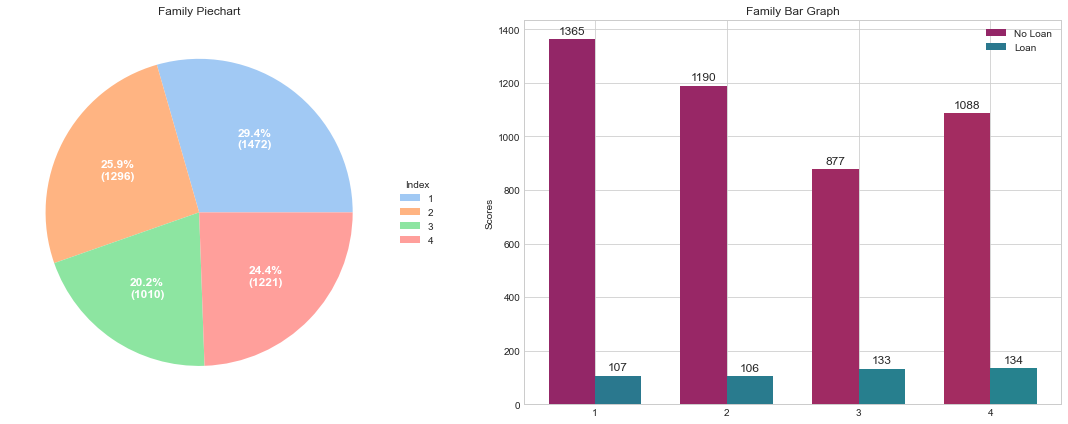

In [ ]:
cat_view('Family')   #khanevadeye chand nafare hast : 1 nafare, 2 nafare, 3 nafare, 4 nafare

In [ ]:
# data shamel : 29% khanevade 1 nafare moadele 1472 nafar, 25.9% khanevade 2 nafare moadele 1296 nafar, 20.2% khanevade 3 nafare moadele 1010 nafar, 24.4% khanevade 4 nafare moadele 1221 nafar
# dar khanevade 1 nafare 107 nafar az in 1472 nafar vam gereftand va 1365 nafar vam nagereftand.
# dar khanevade 2 nafare 106 nafar az in 1296 nafar vam gereftand va 1190 nafar vam nagereftand.
# dar khanevade 3 nafare 133 nafar az in 1010 nafar vam gereftand va 877 nafar vam nagereftand.
# dar khanevade 4 nafare 134 nafar az in 1221 nafar vam gereftand va 1088 nafar vam nagereftand.
#natije : be khanevade 3 va 4 nafare bishtar az baghye vam taalogh gerefte ast.
# pas harche tedade azaye khanevade bishtar shanse daryafte vam bishtar ast.

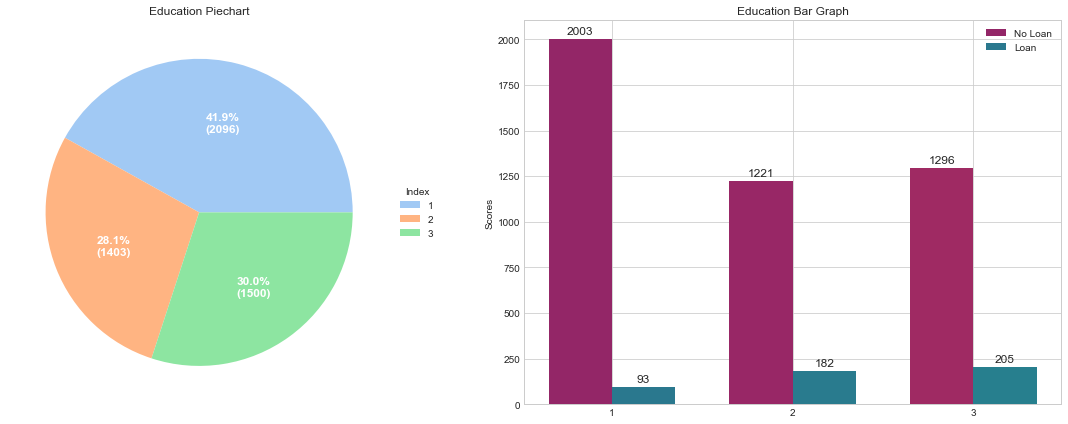

In [ ]:
cat_view('Education')    #sathe tahsilat, (kam = 1, motvaset = 2, ghavi =3)

In [ ]:
# 41.9% data moadele 2096 nafar daraye sathe tahsilate 1(kam), 28.1% data moadele 1403 nafar daraye sathe tahsilate 2(motevaset), 30% data moadele 1500 nafar daraye sathe tahsilate 3(ghavi) budand.
# moshtariyane ba sathe thsilate kam(or 1) 93 nafar az in 2096 nafar, motevaset(or 2) 182 nafar az in 1403 nafar, ghavi(or 3) 205 nafar az in 1500 nafar vam gereftand.
# natije : harche sathe tahsilate moshtariyan bishtar emkane daryafte vam bishtar ast.

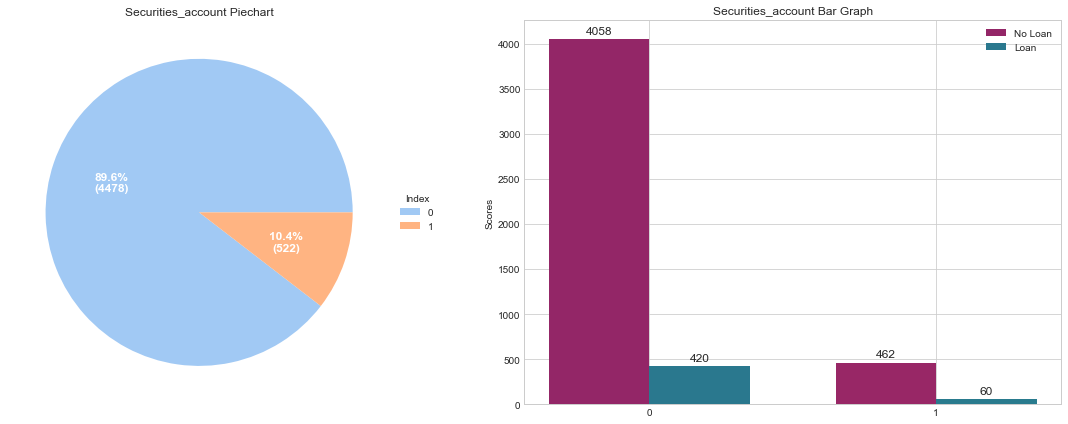

In [ ]:
cat_view('Securities_Account')   #aya un moshtari yek security account dare dar bank ya nadare? (yes=1 va no=0)

In [ ]:
# 89.6% dataset, moadele 4478 nafar Securities_Account nadashtand, 10.4% moadele 522 nafar Securities_Account dashtand.
#60 nafar az in 522 nafar moshtariyani k Securities_Account drand vam grtrftand.
# 420 nafar az in 4478 nafar moshtariyani k Securities_Account nadarnd vam daryaft kardand.
# natije : moshtariyani k Securities_Account nadashtand bishtar vam shamele haleshun shode ast.

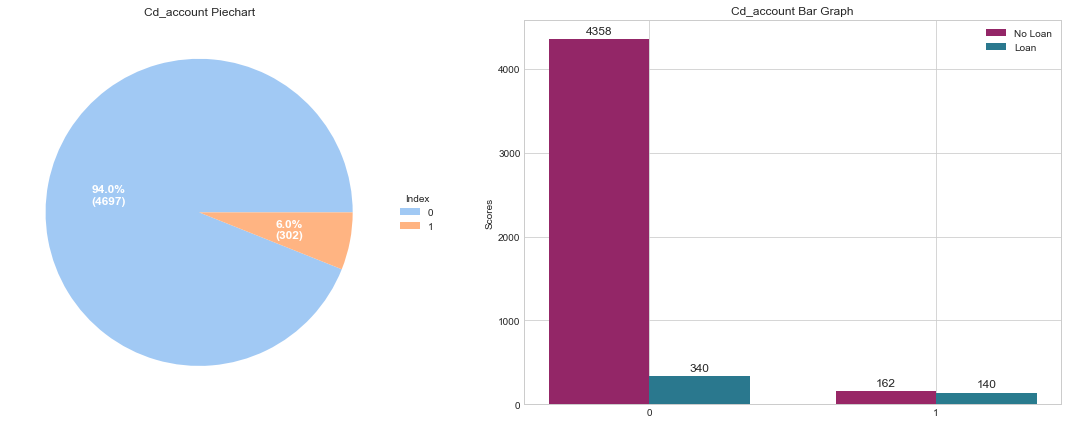

In [ ]:
cat_view('CD_Account')   #aya un moshtari yek CD account dare dar bank ya nadare? (yes=1 va no=0)

In [ ]:
#94% data moadele 4697 nafar CD_Account nadashtand va 6% data moadele 302 nafar CD_Account dashtand.
# 140 nafar az in 302 nafar moshtariyani k CD_Account darand vam gereftand.
# 340 nafar az in 4697 nafar moshtariyani k CD_Account nadarand vam daryaft kardand.
# natije : moshtariyani k CD_Account nadashtand bishtar vam shamele haleshun shode ast.

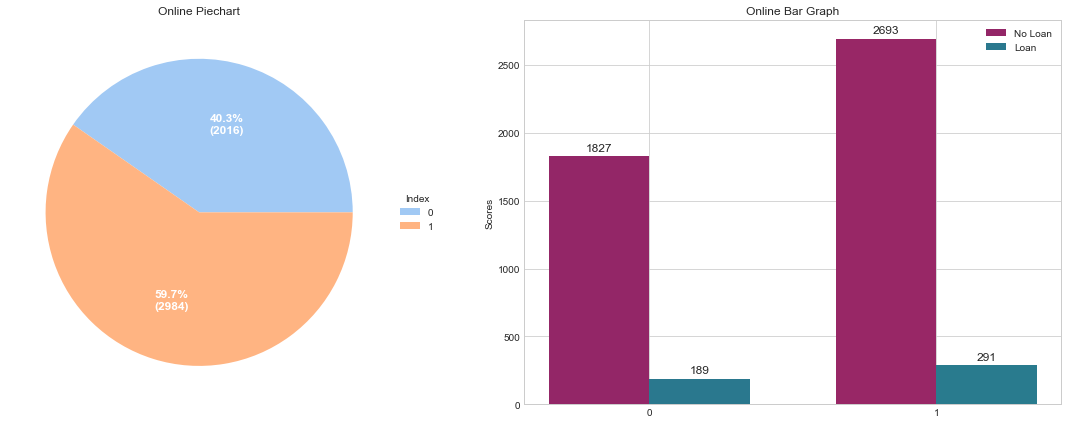

In [ ]:
cat_view('Online')   #aya moshtari az fazaye interneti bank estefade mikone ya na?  (yes=1 va no=0)

In [ ]:
#40.3% data  moadele 2016 nafar az fazaye interneti bank estefade nemikonand va 59.7% moadele 2984 nafar data az fazaye interneti bank estefade mikonand.
# 291 nafar az in 2984 nafar k az fazaye interneti bank estefade mikonand vam gereftand.
# 189 nafar az in 2016 nafar k az fazaye interneti bank estefade nemikonand vam daryaft kardand.
# natije : moshtariyani k az fazaye interneti bank estefade mikonand bishtar ehtemale daryafte vam ro darand.

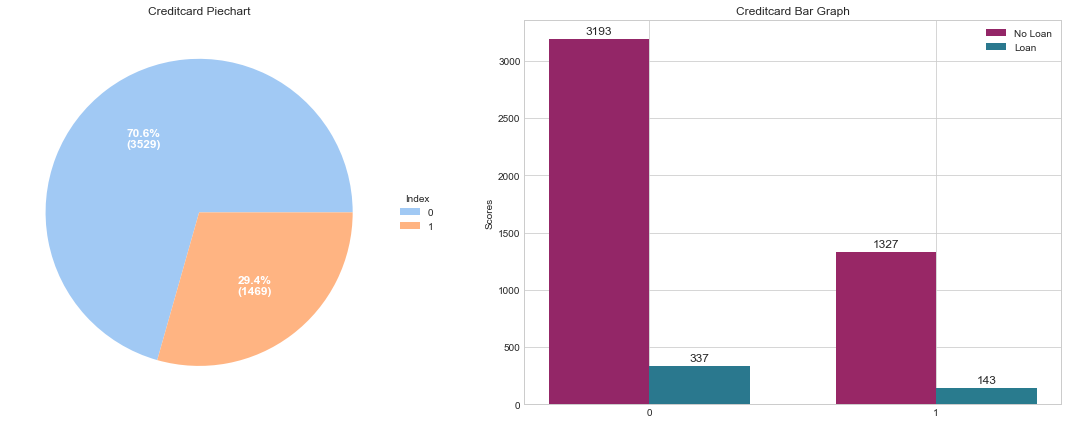

In [ ]:
cat_view('CreditCard')   #karte etebari, (yes=1 va no=0)

In [ ]:
# 70.6% data moadele 3529 nafar CreditCard nadarand va 29.4% data moadele 1469 nafar CreditCard darand
# 143 nafar az in 1469 nafar az moshtariyani k CreditCard darand va 337 nafar az in 3529 nafar az moshtariyani k CreditCard nadarnd vam daryaft kardand.
#natije : moshtariyani k CreditCard nadarnd bishtare ehetemale daryafte vam ra darand.

# Target Variable Distribution

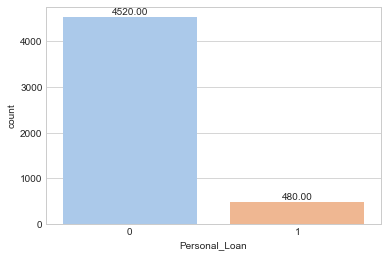

In [ ]:
splot = sns.countplot(x = 'Personal_Loan', data = data)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

In [ ]:
# Target : az 5000 nafar, 480 nafar vam shamele haleshun shod va 4520 nafar vam shamele haleshun nashod .

In [ ]:
data1.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard'],
      dtype='object')

# Multivariate Analysis

In [ ]:
#jodasazi feature va target dar 2 motegghayere X va Y
X = data1.drop('Personal_Loan', axis = 1)        # Features
Y = data1[['Personal_Loan']]                     # Target

In [ ]:
print("shape of x is:",X.shape)      # Namayeshe tedade satr va sotune features
print("shape of y is:",Y.shape)      # Namayeshe tedade satr va sotune Target

shape of x is: (4882, 11)
shape of y is: (4882, 1)


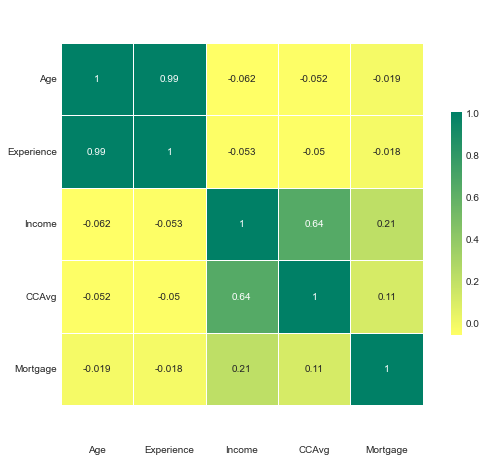

In [ ]:
# barresi correlatin features
corr = X.corr()
plt.figure(figsize=(10, 8))
g = sns.heatmap(corr, annot=True, cmap = 'summer_r', square=True, linewidth=1, cbar_kws={'fraction' : 0.02})
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [ ]:
# mibinim k "Age" ba "Experience"(sabeghe kar) va "CCAvg"(mizane kharjkard) ba "Income" correlation darand.
# yani harche sabeghe kar bishtar bashad mizane kharjkard ham bishtar mishavad va belax.

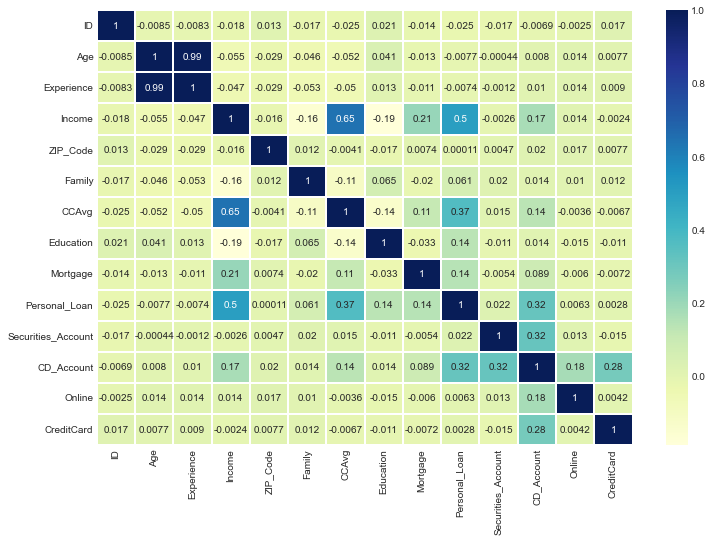

In [ ]:
# barresi correlatin Features & Target
plt.figure(figsize=(12, 8))
sns.heatmap(DATA.corr(), cmap="YlGnBu",  linewidths=.2,annot = True)
plt.show()

In [ ]:
# moshahede mikonim k personal_loan ba features "Income" , CCAvg, CD_Acount correlation bishtari darad.
# ba features Education va Mortgage ham correlation darad vali khyli kam.

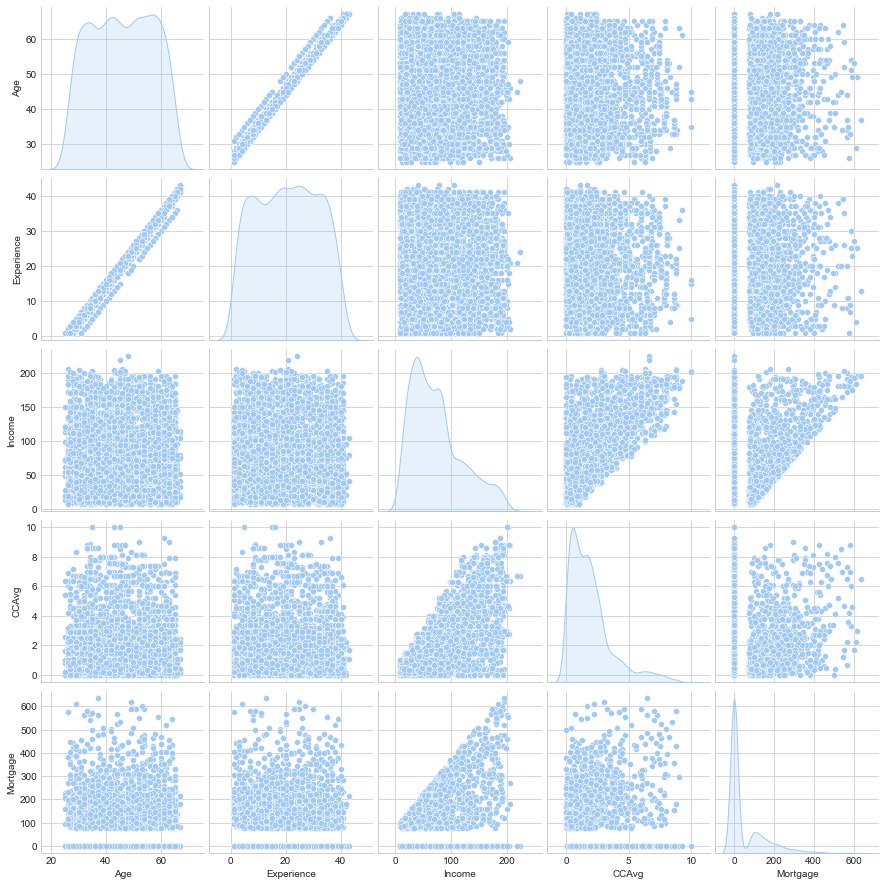

In [ ]:
# Let's plot all Dependent variables to see their inter-relations.
sns.pairplot(X, diag_kind = 'kde', vars = list(data_num.columns))

<AxesSubplot:xlabel='Education', ylabel='Income'>

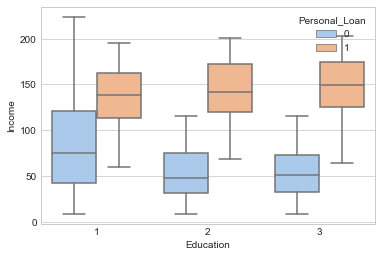

In [ ]:
sns.boxplot(x='Education', y='Income', hue='Personal_Loan', data=data)

In [ ]:
# tedade bishtari az moshtariyani k mizane daramad awli (balatar az 100.000$) va az sathe tahsilate 1( awli) barkhordar budand,nesbat be moshtariyan ba daramade kamtar va sathe 2 va 3 vam daryaft kardand.

In [ ]:
# shomreshe data dar har sotun

In [ ]:
print(data1['Family'].value_counts())

1    1460
2    1256
4    1179
3     987
Name: Family, dtype: int64


In [ ]:
# dar sotune "Family" , 1460ta kanevade 1 nafare va 1256ta khanevade 2 nafare va 1179ta khanevade 4 nafare va 987ta khanevade 3 nafare darim.

In [ ]:
print(data1['Online'].value_counts())

1    2923
0    1959
Name: Online, dtype: int64


In [ ]:
# 2923 nafar az moshtariyan az fazaye interneti bank estefade mikonand va 1959 nafar estefade nemikonand.

In [ ]:
print(data1['Education'].value_counts())

1    2063
3    1452
2    1367
Name: Education, dtype: int64


In [ ]:
# 2063 nafar az moshtariyan daraye sathe tahsilate 1, 1452 nafar az moshtariyan daraye sathe tahsilate 2, 1367 nafar az moshtariyan daraye sathe tahsilate 3

In [ ]:
print(data1['Securities_Account'].value_counts())

0    4374
1     508
Name: Securities_Account, dtype: int64


In [ ]:
# 4374 nafar az moshtariyan, security account nadarand va 508 nafar darand.

In [ ]:
# 4582 nafar az moshtariyan, CD_Account nadarand va 300 nafar darand.

In [ ]:
data1.isnull().sum()   # barresi mojadad missing value featurs

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
# moshahede mishavad k mising value hata bad az hazf noise ndrim.

# modelsazi

In [ ]:
# ebteda yek majmuehye train va test az data dorost mikonim. 20% test 80% train
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1, stratify = Y)

In [ ]:
print("X_train shape:", X_train.shape)          # neshan dadane tedade satro sotune X_train (3905 satr, 11 sotun)
print("X_test shape:", X_test.shape)            # neshan dadane tedade satro sotune X_test
print("y_train shape:", y_train.shape)          # neshan dadane tedade satro sotune y_train
print("y_test shape:", y_test.shape)            # neshan dadane tedade satro sotune y_test (977 satr, 1 sotun)

X_train shape: (3905, 11)
X_test shape: (977, 11)
y_train shape: (3905, 1)
y_test shape: (977, 1)


# Feature Selection :
barresi kardim k kodam features ahamiyate bishtari darand.

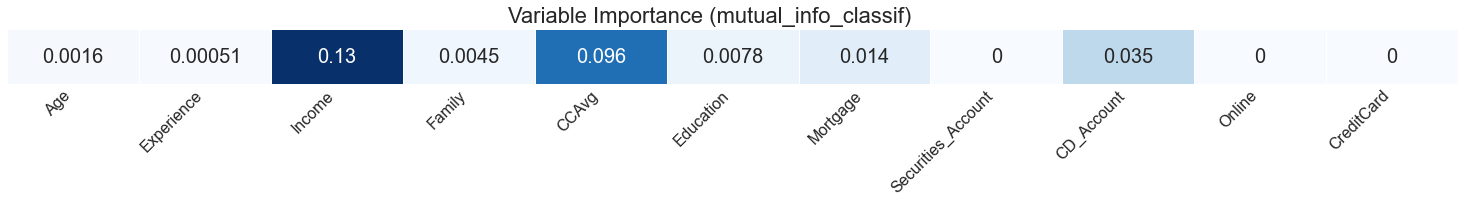

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_information = mutual_info_classif(X_train, y_train, n_neighbors=5, copy = True)

plt.subplots(1, figsize=(26, 1))
sns.heatmap(mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True, annot_kws={"size": 20})
plt.yticks([], [])
plt.gca().set_xticklabels(X_train.columns, rotation=45, ha='right', fontsize=16)
plt.suptitle("Variable Importance (mutual_info_classif)", fontsize=22, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)

In [ ]:
# mutual_info_classif : takhmin etelaate moteghabel baraye target
# Mutual information (MI) : vabastegi beyne moteghayer ha ra andazehgiri mikonad.
# dar vaghe moshakhas kardim k kodam vizhegiha tasire bishtari bar target darand va mohemtarand.
# feature Income , CCAvg daraye ahamiyate bishtar va tasire bishtari bar target darand.

Text(0.5, 0, 'Relative Importance')

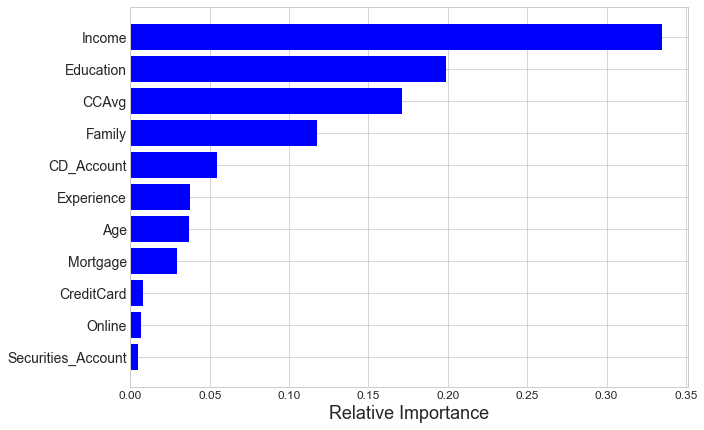

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)      #fit(X_train, y_train) model

features = list(X_train.columns)
importances = rf_clf.feature_importances_     #ahamiyate featur ha ra bar asase miyangin va enheraf meyar dar har derakht mohasebe mikonad.
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 7))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=14)
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize = 18)

In [ ]:
#hamantor k mibinid ahamiyate feature ha ra nesbat be ham neshan dade shode ast.
#k "Income" az ahamiyate bishtari nesbat be baghye barkhordar ast.
# dar vaghe ahamiyate feature hara ra az kamtarin be bishtarin moratab karde ast.

In [ ]:
#numpy.argsort(a, axis=- 1, kind=None, order=None)
#arayeii az shakhesha be shekli k dadeh haye shakhes be surate moratabsazi shode hastand neshan midahad.

In [ ]:
# normalsazi va encoding features categorical va ijad soyunhaye vahed az edghame feature numrical va categorical be surat araye

In [ ]:
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler     #ketabkhane normalsazi
from sklearn.preprocessing import OneHotEncoder      # ramzgozari features categirical be surate araye adadi
from sklearn.compose import ColumnTransformer

X_train_num = X_train.select_dtypes(include='number')        # sotunhaye adadi(number) ra barmigardanad
X_train_cat = X_train.select_dtypes(include='category')      # sotunhaye category ra barmigardanad

num_attribs = list(X_train_num.columns)            # list dorast karde az features numerical
cat_attribs = list(X_train_cat.columns)            # list dorast karde az features catecorical

transformer = ColumnTransformer([                  #ColumnTransformer: Applies transformers to columns of an array or pandas DataFrame
        ("num", StandardScaler(), num_attribs),    # features numerical normalize
        ("cat", OneHotEncoder(), cat_attribs),     #faetures catecorical encode
    ])

X_train = transformer.fit_transform(X_train)      #X_train r fit karde
print(X_train.shape)
X_train[1, :]

(3905, 20)


array([-1.23215147, -1.30462484,  0.15602502,  0.31319726, -0.55619207,
        1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  1.        ,  0.        ])

#from sklearn.preprocessing import OneHotEncoder:

encoding features categirical be surate araye adadi ba, yek sotune binary baraye har daste ijad va yek matrix parakande ya

rayeh moterakem bar migardanad.

#from sklearn.compose import ColumnTransformer:

Applies transformers to columns of an array or pandas DataFrame.

baraye ijad fazaye vizhegi vahed bekar miravad. baraye datasethaiin k daraye features nahamgen( yani dataset ham faeture

numerical dashte bashe va ham feature categorical)

ColumnTransformer: features numerical ra scale(meghyasbandi) va features categorical ra yekseri encode(code gozari) mikonad.

DataFrame.select_dtypes(include=None, exclude=None)

include = dadehaii k mikhym bashnd, masalan include=numerical, لیستی از نام ستون های عددی یک مجموعه داده را برمی گرداند

exclude= dadehaii k mikhym nabashand

# 4.Training Models

In [ ]:
#jodasazi feature va target dar 2 motegghayere X va Y va tabdil X va Y be arayeh
X = data1.drop('Personal_Loan', axis = 1)
Y = data1[['Personal_Loan']].values.reshape(-1,1)

In [ ]:
#Split x and y into training and testing sets, 20% az dataframe ra baraye test va 80% baraye train bezar
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1, stratify = Y)

### LogReg ###

LogesticRegression yek seri function haii darad k bayad az functin haye amade estefade konim va yekseri az in confussion ha ra hal konim, yeki az in confussion ha "solver"

In [ ]:
logreg = LogisticRegression(solver='liblinear')    #algoritme LogesticRegression ro bezar dakhele variable "logrg"
logreg.fit(X_train, y_train)    # amuzeshe va fit kardane model, bar asase x_train va y_train

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = logreg.predict(X_test)   #bar asase x_test miyaym y_prediction ra dorost mikonim

In [ ]:
print("Accuracy :",metrics.accuracy_score(y_test, y_pred))      #Accuracy model

Accuracy : 0.9590583418628454


In [ ]:
print(classification_report(Y, logreg.predict(X)))   #gozareshe pishbiniye model: accuracy, precision, recall, f1-score, support

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4409
           1       0.83      0.61      0.70       473

    accuracy                           0.95      4882
   macro avg       0.89      0.80      0.84      4882
weighted avg       0.95      0.95      0.95      4882



In [ ]:
#labelha 0 va 1

#baraye label 0 : precision=0.96, recall=0.99, f1-score=0.97, support=4409ta data baraye 0 : yani kasanike vajede sharayete vam nabudand.

#baraye label 1 : precision=0.83, recall=0.61, f1-score=0.70, support=473ta data baraye 1 : yani kasanike vajede sharayete vam budand.

#model ruye kasanike vajede sharayete vam nabudand, deghat balatari darad chon tedad data bishtari darad. 4409>473

#accuracy : bar asase f1-score ast. dakhele personal_loan 4882taii "0.95%" ast.

In [ ]:
#moshahede mikonim k Accuracy model ham dar "metrics.accuracy_score" va ham dar "classification_report" 95% ast.

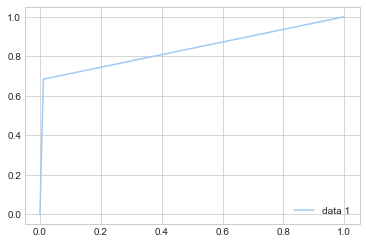

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1")
plt.legend(loc=4)
plt.show()

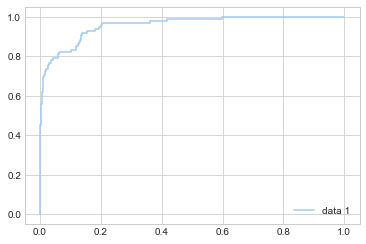

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1")
plt.legend(loc=4)
plt.show()

In [ ]:
logreg.classes_    # target ra chek mikonad va classhaye darune target ra neshan midahad, darvaghe classbandi mikonad.

array([0, 1], dtype=int64)

In [ ]:
# y^ = 1/ (1+e^ (-(w0 + w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + w6x6 + w7x7 + w8x8+w9x9+w10x10+w11x11)))

In [ ]:
logreg.intercept_       #arz az mabda, (w0)

array([-2.84554883])

In [ ]:
logreg.coef_       #maghadire coef k haman zarayebe x mishavand (w1,w2,...,w11)

array([[-3.78762647e-01,  3.78871059e-01,  4.98490079e-02,
         5.96666521e-01,  1.22124128e-01,  1.67987368e+00,
         7.55429152e-04, -8.01239178e-01,  3.38818242e+00,
        -6.86903543e-01, -1.03104272e+00]])

In [ ]:
logreg.predict_proba(X)     #in predict miyad ru mehvare "y" beyne(0 , 1) khodesho map mikone,"x" va "y" ra neshan midahad, pas khoruji 2 bodi ast.

array([[9.97606121e-01, 2.39387923e-03],
       [9.99709795e-01, 2.90205413e-04],
       [9.99875019e-01, 1.24981133e-04],
       ...,
       [9.88633540e-01, 1.13664601e-02],
       [9.95244903e-01, 4.75509710e-03],
       [9.97396586e-01, 2.60341409e-03]])

In [ ]:
logreg.predict(X)     #in predict classbandi mikonad, bayad "y" ya 0 bashad ya 1 bashad,

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
confusion_matrix(Y , logreg.predict(X))      #confusion_matrix

array([[4349,   60],
       [ 183,  290]], dtype=int64)

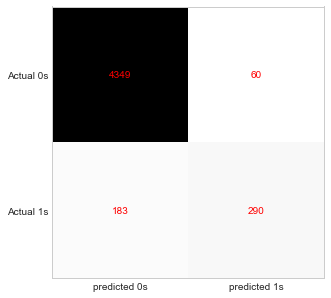

In [ ]:
#confusion_matrix plot
cm = confusion_matrix(Y, logreg.predict(X))
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm)
ax.grid(False)   #gridbandi ndashte bashad
ax.xaxis.set(ticks=(0,1), ticklabels=('predicted 0s', 'predicted 1s'))   #y_predict sutne aval 0 ha va sotun dovom 1ha(predict 0s va 1s)
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))      #va dar y_Actual satre aval 0 ha va satre dovom 1
ax.set_ylim(1.5, -0.5)     #fasele nesbat be mehvare x va y
for i in range(2):         #tedad i ha 2ta ast
    for j in range(2):     #tedade j ha 2ta as
        ax.text(j, i, cm[i, j], ha ='center', va='center', color='red')
plt.show()

4349ta data k vaghean 0 bud model ham gofte 0, darvaghe 4349 nafar k vajed sharayete vam nabudand, model ham be dorosti tashkhis dade k nabudand.

290ta data k vaghean 1 bud model ham gofte vaghean 1, 290 nafar k vajed sharayete vam budand model ham be dorosti tashkhis dade k budand.

183ta data k vaghean 1 bud model gofte 0 , 183 nafar k vajed sharayete vam budand model be eshtebah tashkhis dade k nabudand.

60ta data k vaghean 0 bud model ham gofte 1 , 60 nafar k vajed sharayete vam nabudand vali model be eshtebah tashkhis dade k budand.

768ta sample darim k 4349+290=4639 tashkhis dorost va 183+60=243 tashkhise eshtebah

In [ ]:
# error function
print("MAE: ", (metrics.mean_absolute_error(y_pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(y_pred, y_test)))
print("R2 Score: ", (metrics.r2_score(y_pred, y_test)))

MAE:  0.04094165813715456
MSE:  0.04094165813715456
R2 Score:  0.4223207686622318


In [ ]:
# har che meghdare error kamtar va meghdare score bishtar bashad behtar ast

### Naive Bayes ###

In [ ]:
clf = GaussianNB()             # modele khod ra gaussianNB gozashtim
clf.fit(X_train, y_train.ravel())
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy :",metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.8812691914022518


In [ ]:
print(classification_report(Y, clf.predict(X)))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      4409
           1       0.42      0.58      0.49       473

    accuracy                           0.88      4882
   macro avg       0.69      0.75      0.71      4882
weighted avg       0.90      0.88      0.89      4882



In [ ]:
#labelha 0 va 1

#baraye label 0 : precision=0.95, recall=0.92, f1-score=0.93, support=4409ta data baraye 0 : yani kasanike vajede sharayete vam nabudand.

#baraye label 1 : precision=0.42, recall=0.58, f1-score=0.49, support=473ta data baraye 1 : yani kasanike vajede sharayete vam budand.

#model ruye kasanike vajede sharayete vam nabudand, deghat balatari darad chon tedad data bishtari darad. 4409>473

#accuracy : bar asase f1-score ast. dakhele personal_loan 4882taii "0.88" ast.

In [ ]:
confusion_matrix(Y , clf.predict(X))

array([[4036,  373],
       [ 200,  273]], dtype=int64)

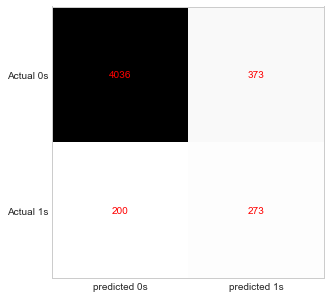

In [ ]:
cm = confusion_matrix(Y, clf.predict(X))
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('predicted 0s', 'predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha ='center', va='center', color='red')
plt.show()

4036ta data k vaghean 0 bud model ham gofte 0, darvaghe 4036 nafar k vajed sharayete vam nabudand, model ham be dorosti tashkhis dade k nabudand.

273ta data k vaghean 1 bud model ham gofte vaghean 1, 273 nafar k vajed sharayete vam budand model ham be dorosti tashkhis dade k budand.

200ta data k vaghean 1 bud model gofte 0 , 200 nafar k vajed sharayete vam budand model be eshtebah tashkhis dade k nabudand.

373ta data k vaghean 0 bud model ham gofte 1 , 373 nafar k vajed sharayete vam nabudand vali model be eshtebah tashkhis dade k budand.

768ta sample darim k 4036+273=4309 tashkhis dorost va 200+373=573 tashkhise eshtebah

In [ ]:
print("MAE: ", (metrics.mean_absolute_error(y_pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(y_pred, y_test)))
print("R2 Score: ", (metrics.r2_score(y_pred, y_test)))

MAE:  0.1187308085977482
MSE:  0.1187308085977482
R2 Score:  -0.036017259031739135


In [ ]:
# har che meghdare error kamtar va meghdare score bishtar bashad behtar ast

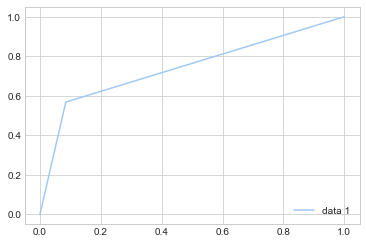

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1")
plt.legend(loc=4)
plt.show()

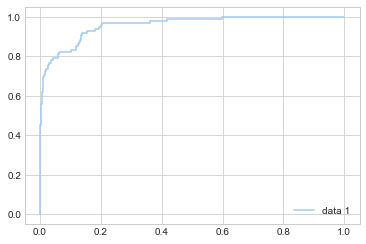

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1")
plt.legend(loc=4)
plt.show()

### KNN ###

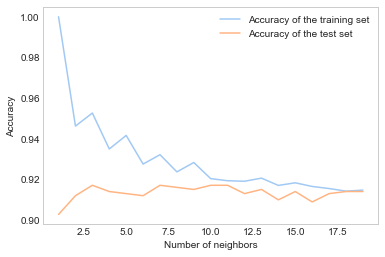

In [ ]:
#peyda kardane behtarin K
training_acc = []
test_acc = []

# try KNN fir diffrent K nearest neighbor from 1 to 15
neighbors_setting = range(1,20)
for n_neighbors in neighbors_setting:   #n_neighbors:motegharist k naghshe shomarande ri darad, neighbors_setting: range 1 ta 20
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train, y_train.ravel())

    #bejaye estefade az prediction ghdrat va accuracy training va testing ra hesab mikonim
    training_acc.append(knn.score(X_train,y_train))
    test_acc.append(knn.score(X_test,y_test))

plt.plot(neighbors_setting, training_acc, label = 'Accuracy of the training set')
plt.plot(neighbors_setting, test_acc, label = 'Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors')
plt.grid()
plt.legend()

In [ ]:
k=11    # chontaghriban  beyne 10 ta 11 train va test nazdik be ham va dar yek rasta hastand.
ckn = KNeighborsClassifier(k)             # modele khod ra gaussianNB gozashtim
ckn.fit(X_train, y_train)
y_pred = ckn.predict(X_test)

In [ ]:
print("Accuracy :",metrics.accuracy_score(y_test, y_pred))      # Accuracy model

Accuracy : 0.917093142272262


In [ ]:
print(classification_report(Y, ckn.predict(X)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      4409
           1       0.67      0.32      0.44       473

    accuracy                           0.92      4882
   macro avg       0.80      0.65      0.70      4882
weighted avg       0.91      0.92      0.91      4882



In [ ]:
#labelha 0 va 1

#baraye label 0 : precision=0.93, recall=0.98, f1-score=0.96, support=4409ta data baraye 0 : yani kasanike vajede sharayete vam nabudand.

#baraye label 1 : precision=0.67, recall=0.32, f1-score=0.44, support=473ta data baraye 1 : yani kasanike vajede sharayete vam budand.

#model ruye kasanike vajede sharayete vam nabudand, deghat balatari darad chon tedad data bishtari darad. 4409>473

#accuracy : bar asase f1-score mohasebe va dakhele personal_loan 4882taii "0.92%" ast.

In [ ]:
confusion_matrix(Y , ckn.predict(X))

array([[4333,   76],
       [ 320,  153]], dtype=int64)

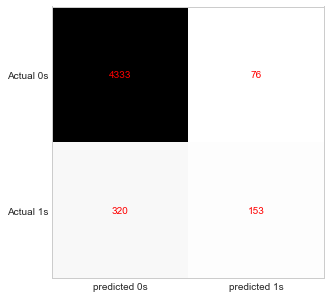

In [ ]:
cm = confusion_matrix(Y, ckn.predict(X))
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('predicted 0s', 'predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha ='center', va='center', color='red')
plt.show()

4333ta data k vaghean 0 bud model ham gofte 0, darvaghe 4333 nafar k vajed sharayete vam nabudand, model ham be dorosti tashkhis dade k nabudand.

153ta data k vaghean 1 bud model ham gofte vaghean 1, 153 nafar k vajed sharayete vam budand model ham be dorosti tashkhis dade k budand.

320ta data k vaghean 1 bud model gofte 0 , 320 nafar k vajed sharayete vam budand model be eshtebah tashkhis dade k nabudand.

76ta data k vaghean 0 bud model ham gofte 1 , 76 nafar k vajed sharayete vam nabudand vali model be eshtebah tashkhis dade k budand.

768ta sample darim k 4333+153=4486 tashkhis dorost va 320+76=396 tashkhise eshtebah

In [ ]:
print("MAE: ", (metrics.mean_absolute_error(y_pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(y_pred, y_test)))
print("R2 Score: ", (metrics.r2_score(y_pred, y_test)))

MAE:  0.08290685772773797
MSE:  0.08290685772773797
R2 Score:  -1.2178409281990916


In [ ]:
# har che meghdare error kamtar va meghdare score bishtar bashad behtar ast

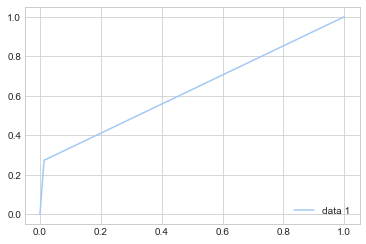

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1")
plt.legend(loc=4)
plt.show()

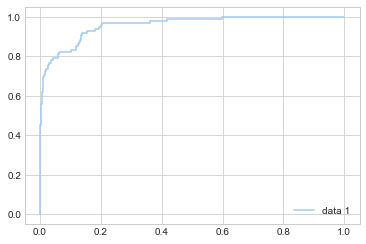

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1")
plt.legend(loc=4)
plt.show()

# 5. Model Selection and Tuning

In [ ]:
#ba tavajoh be inke accuracy model logreg > KNN > Nive Bayes (95% > 92% > 88%), pas modele logreg ra baraye modelsazi entekhab mikonim.

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors":range(1,50)}           # tedade k az 1 ta 50, baste be noe model mishe parametrhaye digari ham lahaz kard.
grid_kn = GridSearchCV(estimator= knn,             #model, yek moteghayer be name grid_kn dorost mikonim, estimator: chizi k gharare modele maro dorost kone.
                      param_grid = parameters,     #range of k
                      scoring = 'accuracy',        #strateghy to evaluate the performance of the cross_validated model on the test set, mikhaym performance cross_validation bar asase accuracy mide ,mikhahim dakhele scoring biyaym accuracy ro hesab konim.
                      cv = 5,                      #cross_validation generator, masalan k ro 5 gozashtim, mitunim ye halghe ham benevisim k foldHAYE MOTEFAVETI BEGIRAD
                      verbose = 1,                 #time to calculate
                      n_jobs = -1)                 #help to cpu, HARCHI N_JOBS KAMTAR BASHAD BE CPU KAMTAR FESHAR MIAVARAD.

grid_kn.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=19), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50)}, scoring='accuracy',
             verbose=1)

In [ ]:
grid_kn.best_params_

{'n_neighbors': 2}

### Data_test_model###
peredict

ID = 5071, Age = 42, Experience = 16, Income = 30, ZIP Code = 92037, Family = 3, CCAvg = 1/2, Education = Advanced

Mortgage = 0, TARGET : Personal Loan = ? aya be shakhsi ba in moshakhasat vam pishnahad mishe ya na?

Securities Account = 1, CD Account = 0, Online = 1, CreditCard = 1

In [ ]:
data1.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard'],
      dtype='object')

In [ ]:
# dataframe nemune jadid ra ba dadane maghadire jadid be features misazim

In [ ]:
X = pd.DataFrame(data1, columns=['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education','Mortgage',
                                 'Securities_Account', 'CD_Account', 'Online', 'CreditCard'])
data2=pd.DataFrame({"Age":[42],
                 "Experience":[16],
                 "Income":[30],
                 "Family":[3],
                 "CCAvg":[1/2],
                 "Education":[3],
                 "Mortgage":[0],
                 "Securities_Account":[1],
                  "CD_Account":[0],
                  "Online":[1],
                  "CreditCard":[1],
                 "Personal_Loan":[3]})

In [ ]:
data3=data1.append(data2)      # dataframe jadid ra ba dataframe ghabli edgham mikonim
data3

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0
4999,28,4,83,3,0.8,1,0,0,0,0,1,1


In [ ]:
#X_train va y_train  ra daste bandi konim

In [ ]:
X_train=data3[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education','Mortgage',
                                 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']][:4882]     # az aval ta 4882 baraye train
y_train=data3[["Personal_Loan"]][:4882].values.reshape(-1,1)

In [ ]:
#X_test ra gharar midahim

In [ ]:
X_test=data3[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education','Mortgage',
                                 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']][4882:]    #az 4882 ta akhar baraye test

In [ ]:
#modelsazi va fit kardane X_train, y_train dar model

In [ ]:
model3= LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                           max_iter=100, multi_class='ovr', n_jobs=None,penalty='l2', random_state=0, solver='liblinear',
                           tol=0.0001, verbose=0, warm_start=False)
model3.fit(X_train, y_train.ravel())

LogisticRegression(C=10, multi_class='ovr', random_state=0, solver='liblinear')

In [ ]:
# dar nahayat predict model

In [ ]:
y_pred=model3.predict(X_test)
y_pred

array([0], dtype=int64)

In [ ]:
print(classification_report(Y, logreg.predict(X)))      #classification_report (accuracy,precision,recall,f1-score)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4409
           1       0.83      0.61      0.70       473

    accuracy                           0.95      4882
   macro avg       0.89      0.80      0.84      4882
weighted avg       0.95      0.95      0.95      4882



In [ ]:
#labelha 0 va 1

#baraye label 0 : precision=0.96, recall=0.99, f1-score=0.97, support=4409ta data baraye 0 : yani kasanike vajede sharayete vam nabudand.

#baraye label 1 : precision=0.83, recall=0.61, f1-score=0.70, support=473ta data baraye 1 : yani kasanike vajede sharayete vam budand.

#model ruye kasanike vajede sharayete vam nabudand, deghat balatari darad chon tedad data bishtari darad. 4409>473

#accuracy : bar asase f1-score ast. dakhele personal_loan 4882taii "0.95%" ast.

In [ ]:
confusion_matrix(Y , logreg.predict(X))    #confusion_matrix

array([[4349,   60],
       [ 183,  290]], dtype=int64)

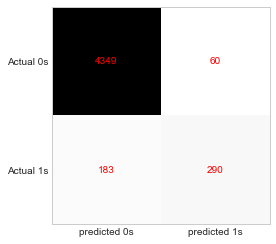

In [ ]:
cm = confusion_matrix(Y, logreg.predict(X))
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('predicted 0s', 'predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha ='center', va='center', color='red')
plt.show()

4349ta data k vaghean 0 bud model ham gofte 0, darvaghe 4349 nafar k vajed sharayete vam nabudand, model ham be dorosti tashkhis dade k nabudand.

290ta data k vaghean 1 bud model ham gofte vaghean 1, 290 nafar k vajed sharayete vam budand model ham be dorosti tashkhis dade k budand.

183ta data k vaghean 1 bud model gofte 0 , 183 nafar k vajed sharayete vam budand model be eshtebah tashkhis dade k nabudand.

60ta data k vaghean 0 bud model ham gofte 1 , 60 nafar k vajed sharayete vam nabudand vali model be eshtebah tashkhis dade k budand.

768ta sample darim k 4349+290=4639 tashkhis dorost va 183+60=243 tashkhise eshtebah

In [ ]:
############## END ##############